In [1]:
import datacube

In [2]:
%matplotlib inline

In [3]:
dc = datacube.Datacube(config='~/.datacube.conf')

In [4]:
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://rishabh@:5432/datacube)>>>

In [5]:
dc.list_measurements()

aliases  dtype      name  nodata  \
product           measurement                                             
ls8_ledaps_scene  sr_band2      [band_2, blue]  int16  sr_band2       0   
                  sr_band3     [band_3, green]  int16  sr_band3   -9999   
                  sr_band4       [band_4, red]  int16  sr_band4   -9999   
                  sr_band5       [band_5, nir]  int16  sr_band5   -9999   
                  sr_band6     [band_6, swir1]  int16  sr_band6   -9999   
ls8_ledaps_albers blue          [band_2, blue]  int16      blue   -9999   
                  green        [band_3, green]  int16     green   -9999   
                  red            [band_4, red]  int16       red   -9999   
                  nir            [band_5, nir]  int16       nir   -9999   
                  swir1        [band_6, swir1]  int16     swir1   -9999   

                                                             spectral_definition  \
product           measurement                                                      
ls8_ledaps_scene  sr_band2     {u'wavelength': [436, 437, 438, 439, 440, 441,...   
                  sr_band3     {u'wavelength': [512, 513, 514, 515, 516, 517,...   
                  sr_band4     {u'wavelength': [625, 626, 627, 628, 629, 630,...   
                  sr_band5     {u'wavelength': [829, 830, 831, 832, 833, 834,...   
                  sr_band6     {u'wavelength': [1515, 1516, 1517, 1518, 1519,...   
ls8_ledaps_albers blue         {u'wavelength': [436, 437, 438, 439, 440, 441,...   
                  green        {u'wavelength': [512, 513, 514, 515, 516, 517,...   
                  red          {u'wavelength': [625, 626, 627, 628, 629, 630,...   
                  nir          {u'wavelength': [829, 830, 831, 832, 833, 834,...   
                  swir1        {u'wavelength': [1515, 1516, 1517, 1518, 1519,...   

                              units  
product           measurement        
ls8_ledaps_scene  sr_band2        1  
                  sr_band3        1  
                  sr_band4        1  
                  sr_band5        1  
                  sr_band6        1  
ls8_ledaps_albers blue            1  
                  green           1  
                  red             1  
                  nir             1  
                  swir1           1

In [6]:
dc.list_products()

,name,description,platform,product_type,instrument,format,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,
1,ls8_ledaps_scene,Landsat 8 LEDAPS 25 metre,LANDSAT_8,LEDAPS,OLI_TIRS,GeoTiff,NaN,NaN,NaN,NaN
2,ls8_ledaps_albers,"Landsat 8 LEDAPS 25 metre, 100km tile, Indian ...",LANDSAT_8,LEDAPS,OLI_TIRS,NetCDF,EPSG:32644,"[-25, 25]","[100000.0, 100000.0]","(y, x)"


In [7]:
var = dc.load(product = 'ls8_ledaps_albers',
              x = (78.0, 78.05),
              y = (31.0, 31.05),
                )
var2 = dc.load(output_crs = 'EPSG:32644', product = 'ls8_ledaps_albers', x = (78.0, 78.05), y = (31.0, 31.05))
var3 = dc.load(output_crs = 'EPSG:4326', product = 'ls8_ledaps_albers', longitude = (78.0, 78.05), latitude = (31.0, 31.05))

In [8]:
var3.crs

EPSG:4326

In [12]:
green  = var2.green

In [13]:
green

<xarray.DataArray 'green' (time: 1, y: 228, x: 198)>
array([[[7700, 7763, 7712, ..., 7307, 7198, 7289],
        [7393, 7441, 7541, ..., 7492, 7388, 7300],
        [7531, 7369, 7287, ..., 8149, 8013, 7594],
        ..., 
        [6858, 6560, 6747, ..., 6955, 6936, 6875],
        [6976, 6771, 6983, ..., 6804, 6742, 6892],
        [6976, 6771, 6983, ..., 6804, 6742, 6892]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2015-02-12T05:17:41
  * y        (y) float64 3.439e+06 3.439e+06 3.439e+06 3.439e+06 3.439e+06 ...
  * x        (x) float64 2.135e+05 2.136e+05 2.136e+05 2.136e+05 2.136e+05 ...
Attributes:
    units: 1
    spectral_definition: {u'wavelength': [512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575,

In [14]:
var3.green

<xarray.DataArray 'green' (time: 1, latitude: 1, longitude: 1)>
array([[[-9999]]], dtype=int16)
Coordinates:
  * time       (time) datetime64[ns] 2015-02-12T05:17:41
  * latitude   (latitude) float64 37.5
  * longitude  (longitude) float64 87.5
Attributes:
    units: 1
    spectral_definition: {u'wavelength': [512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, ...
    nodata: -9999

In [15]:
a = green.loc['2015']
a.shape

(1, 228, 198)

In [16]:
a

<xarray.DataArray 'green' (time: 1, y: 228, x: 198)>
array([[[7700, 7763, 7712, ..., 7307, 7198, 7289],
        [7393, 7441, 7541, ..., 7492, 7388, 7300],
        [7531, 7369, 7287, ..., 8149, 8013, 7594],
        ..., 
        [6858, 6560, 6747, ..., 6955, 6936, 6875],
        [6976, 6771, 6983, ..., 6804, 6742, 6892],
        [6976, 6771, 6983, ..., 6804, 6742, 6892]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2015-02-12T05:17:41
  * y        (y) float64 3.439e+06 3.439e+06 3.439e+06 3.439e+06 3.439e+06 ...
  * x        (x) float64 2.135e+05 2.136e+05 2.136e+05 2.136e+05 2.136e+05 ...
Attributes:
    units: 1
    spectral_definition: {u'wavelength': [512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575,

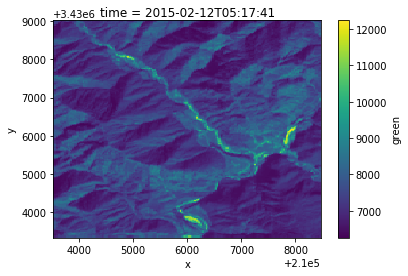

In [17]:
a.plot()


(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([-9999.5, -9999.4, -9999.3, -9999.2, -9999.1, -9999. , -9998.9,
        -9998.8, -9998.7, -9998.6, -9998.5]),
 <a list of 10 Patch objects>)

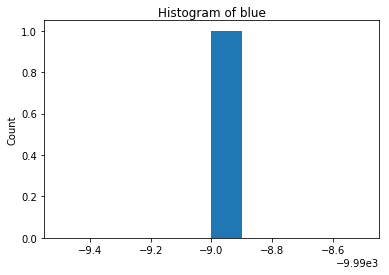

In [20]:
var3.blue.plot()